In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('rf_inputs.csv')
df.set_index('VillageID',inplace=True)
df.head()

,bsgm_wpgp_2015_dst,guf_ghsl_dst_2014,dmsp_2011,ccilc_dst011_2015,ccilc_dst040_2015,ccilc_dst130_2015,ccilc_dst140_2015,ccilc_dst150_2015,ccilc_dst160_2015,ccilc_dst190_2015,...,urbanaccessibility_2015,viirs_2016,wdpa_cat1_dst_2017,Population,DIST_TO_MANGROVE,Population_1,VillageID_1,DIST_TO_MANGROVE_1,area_sqm,log_population
VillageID,,,,,,,,,,,,,,,,,,,,,
2,0.946,0.946,0.0,0.663,4.693,6.291,20.177,342.837006,0.000,2.134,...,169.369995,0.050629,546.718994,200,-126.943531,200,2,-126.943531,1876.919368,5.298317
3,0.000,0.000,0.0,3.470,5.191,6.703,18.664,345.627014,-0.092,2.469,...,142.787506,0.027746,544.018005,270,-45.303730,270,3,-45.303730,7507.932577,5.598422
4,0.093,0.093,0.0,4.370,6.870,4.483,10.965,351.541992,0.186,6.511,...,116.000000,0.036797,540.653015,500,198.853522,500,4,198.853522,0.000000,6.214608
5,0.000,0.000,0.0,4.046,6.203,7.313,17.545,346.170990,0.000,2.207,...,142.514999,0.015195,543.888000,300,113.577526,300,5,113.577526,8446.667623,5.703782
8,0.092,0.092,0.0,1.280,1.987,4.197,16.652,383.230988,0.000,4.431,...,47.062500,0.125886,521.744019,700,-8.841258,700,8,-8.841258,17849.864783,6.551080


In [3]:
%matplotlib inline
import seaborn as sns

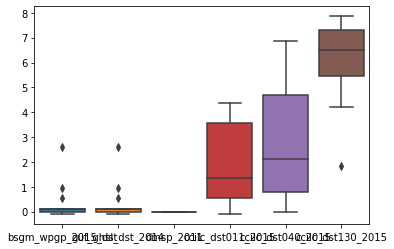

In [4]:
sns.boxplot(data=df[df.columns[0:6]])

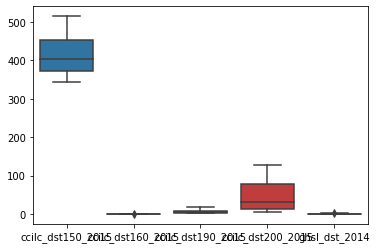

In [5]:
sns.boxplot(data=df[df.columns[7:12]])

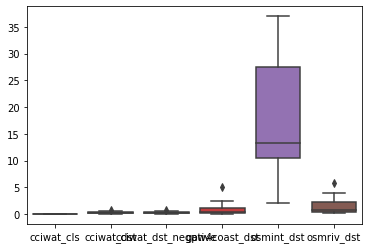

In [6]:
sns.boxplot(data=df[df.columns[13:19]])

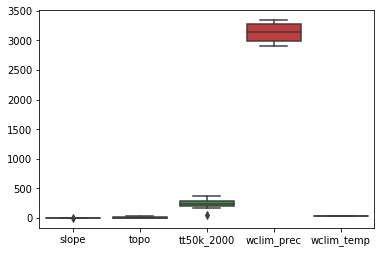

In [7]:
sns.boxplot(data=df[df.columns[20:25]])

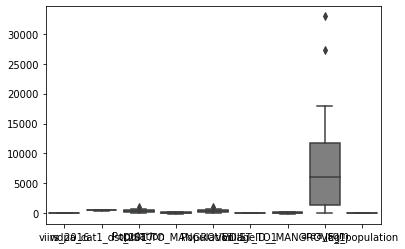

In [8]:
sns.boxplot(data=df[df.columns[26:]])

In [9]:
corr = df.corr()
corr.isnull().sum()

bsgm_wpgp_2015_dst          2
guf_ghsl_dst_2014           2
dmsp_2011                  35
ccilc_dst011_2015           2
ccilc_dst040_2015           2
ccilc_dst130_2015           2
ccilc_dst140_2015           2
ccilc_dst150_2015           2
ccilc_dst160_2015           2
ccilc_dst190_2015           2
ccilc_dst200_2015           2
ghsl_dst_2014               2
guf_dst_2012                2
cciwat_cls                 35
cciwat_dst                  2
cciwat_dst_negative         2
gpw4coast_dst               2
osmint_dst                  2
osmriv_dst                  2
osmroa_dst                  2
slope                       2
topo                        2
tt50k_2000                  2
wclim_prec                  2
wclim_temp                  2
urbanaccessibility_2015     2
viirs_2016                  2
wdpa_cat1_dst_2017          2
Population                  2
DIST_TO_MANGROVE            2
Population_1                2
VillageID_1                 2
DIST_TO_MANGROVE_1          2
area_sqm  

In [10]:
# drop full nulls
df.drop(['dmsp_2011','cciwat_cls'],axis=1,inplace=True)

In [11]:
corr = df.corr()
corr.isnull().sum()

bsgm_wpgp_2015_dst         0
guf_ghsl_dst_2014          0
ccilc_dst011_2015          0
ccilc_dst040_2015          0
ccilc_dst130_2015          0
ccilc_dst140_2015          0
ccilc_dst150_2015          0
ccilc_dst160_2015          0
ccilc_dst190_2015          0
ccilc_dst200_2015          0
ghsl_dst_2014              0
guf_dst_2012               0
cciwat_dst                 0
cciwat_dst_negative        0
gpw4coast_dst              0
osmint_dst                 0
osmriv_dst                 0
osmroa_dst                 0
slope                      0
topo                       0
tt50k_2000                 0
wclim_prec                 0
wclim_temp                 0
urbanaccessibility_2015    0
viirs_2016                 0
wdpa_cat1_dst_2017         0
Population                 0
DIST_TO_MANGROVE           0
Population_1               0
VillageID_1                0
DIST_TO_MANGROVE_1         0
area_sqm                   0
log_population             0
dtype: int64

In [12]:
corr.log_population

bsgm_wpgp_2015_dst        -0.443961
guf_ghsl_dst_2014         -0.443961
ccilc_dst011_2015         -0.126465
ccilc_dst040_2015         -0.097729
ccilc_dst130_2015         -0.060866
ccilc_dst140_2015         -0.050050
ccilc_dst150_2015         -0.035995
ccilc_dst160_2015          0.092098
ccilc_dst190_2015          0.021814
ccilc_dst200_2015         -0.067607
ghsl_dst_2014             -0.423925
guf_dst_2012              -0.549707
cciwat_dst                 0.244927
cciwat_dst_negative        0.244927
gpw4coast_dst              0.249973
osmint_dst                -0.173572
osmriv_dst                 0.187002
osmroa_dst                -0.196094
slope                      0.224786
topo                       0.472291
tt50k_2000                -0.452345
wclim_prec                -0.284977
wclim_temp                -0.217391
urbanaccessibility_2015   -0.297690
viirs_2016                 0.178633
wdpa_cat1_dst_2017         0.052470
Population                 0.946168
DIST_TO_MANGROVE           0

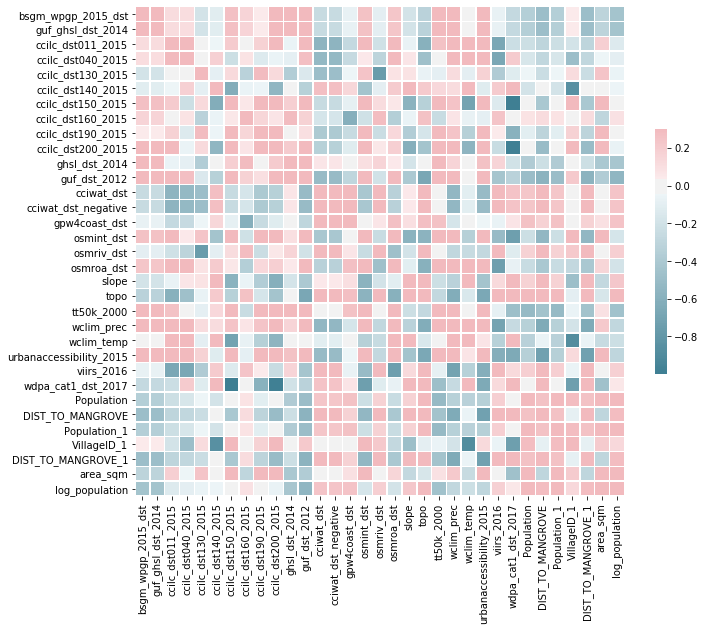

In [13]:
# plot a correlation heat map
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.yticks(rotation=70) # doesn't work interacive, but OK inline 
plt.xticks(rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# removed mask from parameters mask=mask, 

In [14]:
# set up x and y as data frames
y = df.log_population
x = df.drop(
    ['Population','log_population','Population_1','DIST_TO_MANGROVE_1','VillageID_1']
    ,axis=1
)
x.describe()

,bsgm_wpgp_2015_dst,guf_ghsl_dst_2014,ccilc_dst011_2015,ccilc_dst040_2015,ccilc_dst130_2015,ccilc_dst140_2015,ccilc_dst150_2015,ccilc_dst160_2015,ccilc_dst190_2015,ccilc_dst200_2015,...,slope,topo,tt50k_2000,wclim_prec,wclim_temp,urbanaccessibility_2015,viirs_2016,wdpa_cat1_dst_2017,DIST_TO_MANGROVE,area_sqm
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.291000,0.291000,1.908938,2.742125,6.089812,12.130437,416.118061,0.047750,6.049187,48.024750,...,1.437500,10.625000,242.637347,3124.614685,26.709874,136.337343,0.059703,502.044809,44.186679,8877.040063
std,0.670436,0.670436,1.696346,2.257910,1.606568,5.271829,58.893230,0.158975,4.485972,44.009872,...,1.152895,7.762087,79.631698,160.140490,0.520104,94.486583,0.033226,35.938269,123.329141,9978.923675
min,-0.092000,-0.092000,-0.093000,0.000000,1.855000,4.595000,342.837006,-0.367000,1.443000,3.920000,...,0.000000,0.000000,50.537498,2909.912598,26.143747,14.212500,0.015195,437.378998,-148.606878,0.000000
25%,0.000000,0.000000,0.543750,0.787000,5.455750,7.467500,372.961990,0.000000,2.403500,12.926250,...,0.750000,5.500000,206.012505,2990.971924,26.316563,45.840625,0.030907,481.078247,-46.335856,1407.689526
50%,0.092000,0.092000,1.346000,2.115000,6.497000,11.598000,403.103500,0.046000,5.270000,30.063500,...,1.500000,8.500000,232.313751,3145.037476,26.517760,142.651253,0.051091,511.487000,54.995237,6113.857780
75%,0.093000,0.093000,3.584000,4.702500,7.319250,16.875250,453.894745,0.143500,8.590750,76.724751,...,2.000000,14.250000,288.170631,3271.908691,26.897866,176.393120,0.078231,527.917984,118.870519,11766.004720
max,2.616000,2.616000,4.370000,6.870000,7.861000,20.177000,515.054993,0.332000,17.844999,128.112000,...,4.000000,26.000000,375.750000,3337.837402,27.606396,308.049988,0.125886,546.718994,268.959965,32942.794903


In [15]:
# the pairplot is slow to produce and not so useful
#pairplot(df[df.columns[0:8]])

In [16]:
# use the default random forest regressor for an initial test
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(oob_score=True,n_estimators=500)

In [17]:
regr.fit(x,y.values)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
results = zip(x.columns,regr.feature_importances_)
for result in results:
    print('{}: {}'.format(result[0],result[1]))

bsgm_wpgp_2015_dst: 0.07297511170410739
guf_ghsl_dst_2014: 0.0796951268658569
ccilc_dst011_2015: 0.013288033556923692
ccilc_dst040_2015: 0.014695896485563388
ccilc_dst130_2015: 0.02074430851242387
ccilc_dst140_2015: 0.04366237651242971
ccilc_dst150_2015: 0.0054280871720761735
ccilc_dst160_2015: 0.01721133928506092
ccilc_dst190_2015: 0.030581986188579834
ccilc_dst200_2015: 0.006095384546120057
ghsl_dst_2014: 0.022099551214274687
guf_dst_2012: 0.059870470812320324
cciwat_dst: 0.016292266832888345
cciwat_dst_negative: 0.012433036743062611
gpw4coast_dst: 0.007208662533829791
osmint_dst: 0.05415038077962412
osmriv_dst: 0.03067025078095323
osmroa_dst: 0.01997702895508908
slope: 0.020410917001166522
topo: 0.1446703955759801
tt50k_2000: 0.022573016166734062
wclim_prec: 0.05805484030684958
wclim_temp: 0.046048321551521054
urbanaccessibility_2015: 0.01588311779593878
viirs_2016: 0.009517267739074735
wdpa_cat1_dst_2017: 0.013298571601744545
DIST_TO_MANGROVE: 0.057549735079063226
area_sqm: 0.08491

In [19]:
print(regr.oob_score_)

-0.08652271539352441


In [20]:
# small n, so use cross k-fold validation
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc

cv = KFold(n_splits=16,random_state=1,shuffle=True)

In [21]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    # not necessary here with n=1, but useful for
    # future when we may have more reults. 
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {0:.1f} persons.'.format(np.exp(np.mean(errors))))
    print('Accuracy = {0:.2f}%.'.format(accuracy))
    
    return accuracy

In [22]:
accuracy = []
clf = RandomForestRegressor(n_estimators=500)
#x_ = pd.DataFrame(x.values,columns=x.columns)
for (train, test), i in zip(cv.split(x,y), range(16)):
    clf.fit(x.iloc[train],y.iloc[train])
    predict = clf.predict(x.iloc[test])
    accuracy.append(evaluate(clf,x.iloc[test],y.iloc[test]))


Model Performance
Average Error: 1.3 persons.
Accuracy = 94.78%.
Model Performance
Average Error: 1.3 persons.
Accuracy = 94.70%.
Model Performance
Average Error: 1.4 persons.
Accuracy = 94.48%.
Model Performance
Average Error: 1.8 persons.
Accuracy = 90.84%.
Model Performance
Average Error: 1.4 persons.
Accuracy = 94.59%.
Model Performance
Average Error: 1.2 persons.
Accuracy = 97.27%.
Model Performance
Average Error: 1.8 persons.
Accuracy = 90.73%.
Model Performance
Average Error: 1.1 persons.
Accuracy = 98.37%.
Model Performance
Average Error: 1.6 persons.
Accuracy = 91.62%.
Model Performance
Average Error: 1.9 persons.
Accuracy = 88.01%.
Model Performance
Average Error: 1.3 persons.
Accuracy = 95.98%.
Model Performance
Average Error: 4.8 persons.
Accuracy = 66.05%.
Model Performance
Average Error: 1.9 persons.
Accuracy = 90.09%.
Model Performance
Average Error: 1.4 persons.
Accuracy = 95.09%.
Model Performance
Average Error: 2.8 persons.
Accuracy = 85.01%.
Model Performance
Average

In [23]:
print('Overall average accuracy: {0:.2f}%'.format(sum(accuracy) / len(accuracy)))
print('Best accuracy achieved: {0:.2f}%'.format(max(accuracy)))
print('Worst accuracy achieved: {0:.2f}%'.format(min(accuracy)))

Overall average accuracy: 91.52%
Best accuracy achieved: 98.37%
Worst accuracy achieved: 66.05%


## Use hyperparameter tuning
Based on sklearn documentation and this post:
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [24]:
from pprint import pprint
rf = RandomForestRegressor(random_state = 42)
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [25]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [26]:
rf_random = RandomizedSearchCV(
    estimator = rf, 
    param_distributions = random_grid, 
    n_iter = 100, 
    cv = 3, 
    verbose=2, 
    random_state=42, 
    n_jobs = 24 # run was on a large machine
    #n_jobs = -1, # will use all cores )
)
rf_random.fit(x.values,y.values)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done 114 tasks      | elapsed:   13.5s
[Parallel(n_jobs=24)]: Done 300 out of 300 | elapsed:   32.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [27]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [28]:
# use the "best" parameters to evaluate the model with 
# leave-one-out test and training data. 

rf = RandomForestRegressor(
    bootstrap=True,
    max_depth=110,
    max_features= 'sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=600
)
accuracy = []
for (train, test), i in zip(cv.split(x,y), range(16)):
    rf.fit(x.iloc[train],y.iloc[train])
    predict = clf.predict(x.iloc[test])
    accuracy.append(evaluate(clf,x.iloc[test],y.iloc[test]))
    

Model Performance
Average Error: 1.1 persons.
Accuracy = 97.97%.
Model Performance
Average Error: 1.1 persons.
Accuracy = 98.22%.
Model Performance
Average Error: 1.1 persons.
Accuracy = 97.58%.
Model Performance
Average Error: 1.2 persons.
Accuracy = 96.43%.
Model Performance
Average Error: 1.1 persons.
Accuracy = 98.46%.
Model Performance
Average Error: 1.0 persons.
Accuracy = 99.34%.
Model Performance
Average Error: 1.2 persons.
Accuracy = 96.70%.
Model Performance
Average Error: 1.0 persons.
Accuracy = 99.73%.
Model Performance
Average Error: 1.2 persons.
Accuracy = 96.75%.
Model Performance
Average Error: 1.3 persons.
Accuracy = 95.77%.
Model Performance
Average Error: 1.1 persons.
Accuracy = 98.33%.
Model Performance
Average Error: 1.8 persons.
Accuracy = 87.20%.
Model Performance
Average Error: 1.2 persons.
Accuracy = 96.94%.
Model Performance
Average Error: 1.1 persons.
Accuracy = 98.16%.
Model Performance
Average Error: 1.5 persons.
Accuracy = 94.31%.
Model Performance
Average

In [29]:
print('Overall average accuracy: {0:.1f}%'.format(sum(accuracy) / len(accuracy)))
print('Best accuracy achieved: {0:.1f}%'.format(max(accuracy)))
print('Worst accuracy achieved: {0:.1f}%'.format(min(accuracy)))

Overall average accuracy: 96.8%
Best accuracy achieved: 99.7%
Worst accuracy achieved: 87.2%


Roughly 5% improvement using hyerparameters. Train on all data, then predict. Small n, so we are using the whole data set and out of bag score for the model

In [30]:
rf.oob_score = True
rf.fit(x,y)
rf.oob_score_

-0.058371482221491355

Although the test-train-split shows good results, the OOB score indicates that the model is **not very good**. We need more data points to realistically use ML for this prediction. 

In [31]:
# read in the data frame with the covariates
sle_df = pd.read_csv('sle_rf_inputs.csv')
sle_df.set_index('Id',inplace=True)
sle_df.head()

,sle,bsgm_wpgp_2015_dst,guf_ghsl_dst_2014,dmsp_2011,ccilc_dst011_2015,ccilc_dst040_2015,ccilc_dst130_2015,ccilc_dst140_2015,ccilc_dst150_2015,ccilc_dst160_2015,...,slope,topo,tt50k_2000,wclim_prec,wclim_temp,urbanaccessibility_2015,viirs_2016,wdpa_cat1_dst_2017,area_sqm,DIST_TO_MANGROVE
Id,,,,,,,,,,,,,,,,,,,,,
5219131,1,0.000,0.000,0.0,0.366,0.000,0.093,14.771000,363.092987,2.641,...,3.0,14.0,213.500000,3053.074951,27.424271,97.987503,0.025645,518.198975,1876.369037,32.494005
5219462,2,0.000,0.000,0.0,0.366,0.000,0.093,14.771000,363.092987,2.641,...,3.0,14.0,213.500000,3053.074951,27.424271,97.987503,0.025645,518.198975,938.185935,66.998024
5219816,3,0.092,0.092,0.0,0.185,0.207,-0.093,14.192000,362.609009,2.237,...,3.0,9.0,204.250000,3061.050049,27.445520,99.512497,0.040240,518.778015,1876.373995,124.069953
5225895,4,0.000,0.000,0.0,0.000,0.464,0.721,14.329000,342.838013,0.093,...,2.0,16.0,439.112488,3343.070068,27.902748,168.707504,0.043453,541.991028,7505.677160,92.888436
5228640,5,0.093,0.093,0.0,0.093,1.692,3.939,22.743999,335.585999,0.000,...,1.0,12.0,272.977509,3384.245117,27.980728,194.307495,0.008730,550.773010,938.220597,88.822212


In [32]:
x_predict = sle_df.drop(['sle','cciwat_cls','dmsp_2011'],axis=1)
x_predict.shape

(2763, 28)

In [33]:
x.shape

(16, 28)

In [34]:
# check order of columns, must be identical! 
predictCols = x.columns
sleCols = x_predict.columns
colCheck = zip(predictCols,sleCols)
for c in colCheck:
    if c[0] != c[1]:
        print('Mismatch: {}'.format(c))

print(len(sleCols) - len(predictCols))

Mismatch: ('DIST_TO_MANGROVE', 'area_sqm')
Mismatch: ('area_sqm', 'DIST_TO_MANGROVE')
0


In [35]:
# reset x_predict columns to match x
x_predict = x_predict[predictCols]

In [36]:
predictions = rf.predict(x_predict)

In [37]:
predictions

array([5.92839088, 5.92839088, 5.95551779, ..., 5.91652232, 5.70074396,
       5.70124082])

In [38]:
predictions.min()

5.52050477026142

In [39]:
len(predictions)

2763

In [40]:
np.exp(predictions).min()

249.7610773406594

In [41]:
np.exp(predictions).max()

436.34692499716385

In [42]:
output = zip(x_predict.index,predictions)
with open('sle_predictions_rf.csv','w') as f:
    f.writelines('ID,pop_predicted_rf\n')
    for line in output:
        f.writelines('{},{}\n'.format(line[0],line[1]))
        

In [43]:
# predict for other countries
def predict_country(iso):
    pred_df = pd.read_csv('./{}_rf_inputs.csv'.format(iso))
    pred_df.set_index('Id',inplace=True)
    # drop columns not in model and fill any nan values
    x_predict = pred_df.drop([iso,'cciwat_cls','dmsp_2011'],axis=1).fillna(0)


    predictions = rf.predict(x_predict)
    pop_predictions = zip(x_predict.index,predictions)
    with open('{}_predictions_rf.csv'.format(iso),'w') as f:
        f.writelines('ID,pop_predicted_rf\n')
        for line in pop_predictions:
            f.writelines('{},{}\n'.format(line[0],line[1]))
    print('prediction complete for {}'.format(iso))

In [44]:
import glob
isos = [iso[:3] for iso in glob.glob('*_rf_inputs.csv')]
isos

['ben', 'civ', 'gab', 'gha', 'gin', 'gmb', 'gnb', 'sle']

In [45]:
for iso in isos:
    print('Predicting {}'.format(iso))
    predict_country(iso)

Predicting ben
prediction complete for ben
Predicting civ
prediction complete for civ
Predicting gab
prediction complete for gab
Predicting gha
prediction complete for gha
Predicting gin
prediction complete for gin
Predicting gmb
prediction complete for gmb
Predicting gnb
prediction complete for gnb
Predicting sle
prediction complete for sle
